<a href="https://www.kaggle.com/code/janadarwish/checkerboard-on-iris-data-set?scriptVersionId=262381273" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

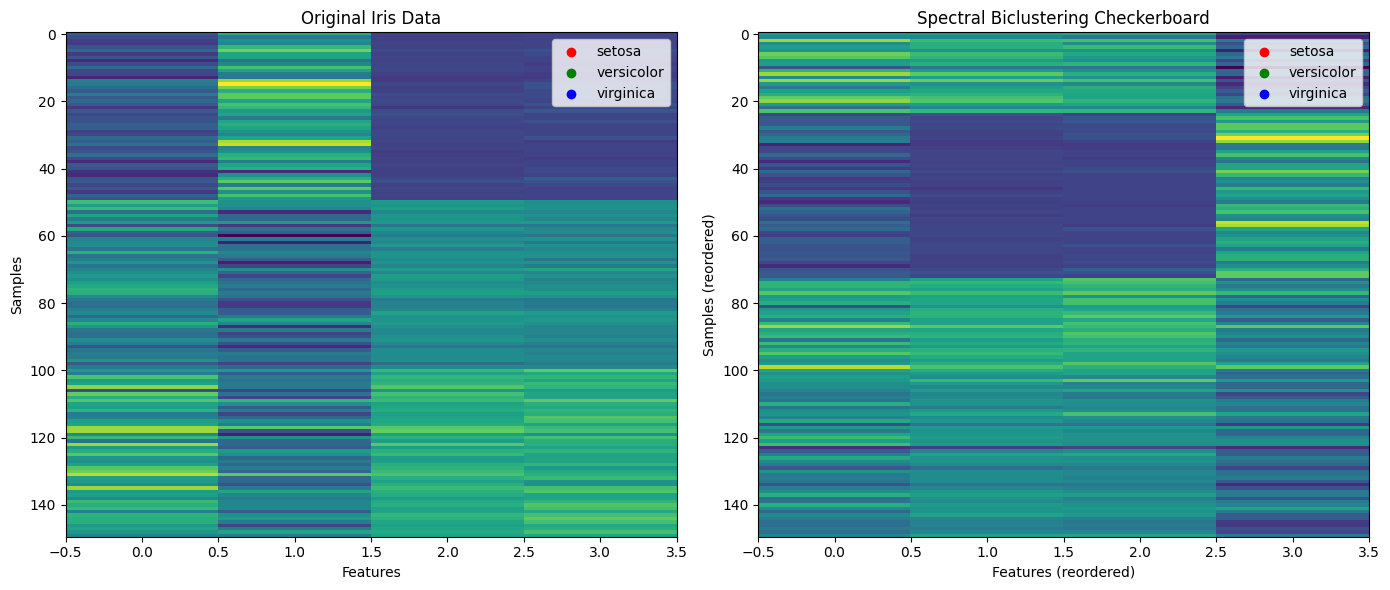

Row cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 2
 0 2 0 2 2 2 2 0 0 2 2 0 0 2 2 2 2 0 0 0 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2
 2 2]
Column cluster labels: [0 1 0 0]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralBiclustering

iris = load_iris()
X = iris.data  
y = iris.target  
feature_names = iris.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_row_clusters = 3  
n_col_clusters = 2 
model = SpectralBiclustering(n_clusters=(n_row_clusters, n_col_clusters), random_state=42)
model.fit(X_scaled)

row_order = np.argsort(model.row_labels_)
col_order = np.argsort(model.column_labels_)
X_reordered = X_scaled[row_order][:, col_order]
y_reordered = y[row_order]


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


species_colors = ['red', 'green', 'blue']
axes[0].imshow(X_scaled, aspect='auto', cmap='viridis')
for i, label in enumerate(np.unique(y)):
    axes[0].scatter([], [], color=species_colors[label], label=iris.target_names[label])
axes[0].set_title('Original Iris Data')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Samples')
axes[0].legend()


axes[1].imshow(X_reordered, aspect='auto', cmap='viridis')
for i, label in enumerate(np.unique(y_reordered)):
    axes[1].scatter([], [], color=species_colors[label], label=iris.target_names[label])
axes[1].set_title('Spectral Biclustering Checkerboard')
axes[1].set_xlabel('Features (reordered)')
axes[1].set_ylabel('Samples (reordered)')
axes[1].legend()

plt.tight_layout()
plt.show()


print("Row cluster labels:", model.row_labels_)
print("Column cluster labels:", model.column_labels_)
